### Question 1:
Machine learning is used in many different applications, but some are more useful than others. The most useful application for machine learning is when the data set is too large to be sorted through by a human being, because it gives the person more time to work on other tasks that require a human's ability for discernment. Large data sets are also much more difficult for a human to spot patterns in. Even in large data sets, there are cases where the task can be handled by code. However, when the tasks are too complex for a set of rules and if-statements to accurately sort through, machine learning can be used. If the rules are too overlapping and require fine-tuning, a human's code is too prone to errors because of all the factors that influence the data. Machine learning models can also be quite flexible, and can be used to predict a wide range of data types and inputs, even if they might fall on the extreme edge of the training data set. Because of the aforementioned reasons, machine learning has been used for assessing disease risk, fraud detection, chatbots, and more. Despite all of this, many tasks are too simple for machine learning. Generally, if a problem can be solved using simple methods or rules, machine learning is not needed. For example, if something can be programmed using if-else statements and math equations, a machine learning model will make the software bloated. Machine learning will also be useless if the data set it's trained on has a lot of "noise", or irrelevant information. The data must also be unbiased, and large enough to avoid issues with false correlations. It also takes a lot of time and money to develop an effective model, which can be a detriment to projects on a strict deadline. Given the pros and cons of machine learning, it still continues to be a field that is experiencing huge growth in the computing industry.

### Question 2:

Preprocessing step 1: importing the necessary libraries and tools needed for the task(s) at hand.

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Preprocessing step 2: converting the raw csv file into a dataframe that python can interpret.

In [162]:
loans_df = pd.read_csv('loans_full_schema.csv')
loans_df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


Preprocessing step 3: getting rid of NaN values

In [174]:
loans_df = loans_df.dropna(axis=1)
loans_df = loans_df.dropna()
loans_df.head(20)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
37,supplies clerk,10.0,NJ,MORTGAGE,70000.0,Verified,17.06,105000.0,Verified,13.27,...,Mar-2018,In Grace Period,whole,Cash,23455.27,1102.83,544.73,558.10,0.0,Northeast
99,owner,10.0,MN,MORTGAGE,23000.0,Verified,49.58,98000.0,Verified,19.87,...,Feb-2018,Current,whole,Cash,14395.45,1572.97,604.55,968.42,0.0,Midwest
130,military officer captain,10.0,GA,RENT,145000.0,Verified,14.66,155000.0,Source Verified,14.98,...,Feb-2018,Current,whole,Cash,35942.19,4890.01,4057.81,832.20,0.0,South
214,realtor / assistant,5.0,NJ,MORTGAGE,80000.0,Not Verified,18.39,125000.0,Not Verified,11.77,...,Jan-2018,Current,whole,Cash,13068.02,1460.76,931.98,528.78,0.0,Northeast
352,manager,10.0,TX,MORTGAGE,120000.0,Verified,7.81,198000.0,Verified,15.15,...,Jan-2018,Current,whole,Cash,21847.54,3859.28,3152.46,706.82,0.0,Plains
411,community development manger,3.0,CA,RENT,55000.0,Source Verified,12.52,198000.0,Source Verified,24.29,...,Mar-2018,Current,whole,Cash,14811.36,1413.83,713.64,700.19,0.0,Pacific
472,office manager,1.0,CA,RENT,41000.0,Source Verified,27.43,101000.0,Source Verified,11.13,...,Jan-2018,Current,whole,Cash,10353.23,1132.78,446.77,686.01,0.0,Pacific
516,receptionist,3.0,SC,MORTGAGE,3300.0,Not Verified,469.09,283300.0,Not Verified,9.79,...,Feb-2018,Current,whole,Cash,22643.18,3287.65,2356.82,930.83,0.0,South
564,senior cohort sales advisor,3.0,VA,RENT,200000.0,Source Verified,27.40,300000.0,Source Verified,28.08,...,Jan-2018,Current,whole,Cash,18684.61,2110.27,1315.39,794.88,0.0,South
627,executive assistant/office manager,2.0,WA,RENT,113000.0,Not Verified,23.57,262000.0,Not Verified,16.59,...,Feb-2018,Current,whole,Cash,20832.99,1834.06,1167.01,667.05,0.0,Pacific


Preprocessing 4: Getting an overview of the correlations between columns

In [175]:
loans_df.corr(numeric_only=True)

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.169817,-0.137558,0.026200,0.020197,-0.027395,0.110214,-0.098302,-0.092515,-0.041645,...,-0.090391,0.080300,0.048471,-0.071673,0.036386,0.075493,0.047596,0.060333,-0.010900,-0.105259
annual_income,0.169817,1.000000,-0.280191,0.718367,-0.178499,-0.029384,0.031119,-0.068020,-0.018368,0.107728,...,-0.021248,0.241732,0.188675,-0.214331,0.125106,0.239842,0.101808,0.088182,0.069506,0.003143
debt_to_income,-0.137558,-0.280191,1.000000,0.059522,0.161628,-0.005175,-0.008219,-0.114086,0.073929,0.197817,...,-0.064682,0.059406,-0.123217,0.019362,0.122825,0.053817,0.065363,0.059729,0.037551,-0.014569
annual_income_joint,0.026200,0.718367,0.059522,1.000000,-0.265198,-0.001724,-0.041806,-0.118299,0.018015,0.188425,...,-0.036926,0.319454,0.126303,-0.207292,0.235967,0.299234,0.250866,0.248166,0.100638,0.033112
debt_to_income_joint,0.020197,-0.178499,0.161628,-0.265198,1.000000,0.044085,0.030160,-0.079809,-0.030379,0.125035,...,-0.214136,0.044825,0.041736,0.245511,0.100630,0.058875,-0.009468,-0.090609,0.181834,0.019856
delinq_2y,-0.027395,-0.029384,-0.005175,-0.001724,0.044085,1.000000,-0.576158,-0.049905,0.039601,-0.052312,...,-0.084054,0.057611,-0.087918,0.080210,0.113471,0.040150,0.165612,0.147370,0.104200,-0.033790
months_since_last_delinq,0.110214,0.031119,-0.008219,-0.041806,0.030160,-0.576158,1.000000,0.019888,-0.112450,-0.005976,...,0.085864,-0.014952,0.098675,-0.103453,-0.069341,0.008398,-0.171426,-0.178022,-0.049511,-0.009264
earliest_credit_line,-0.098302,-0.068020,-0.114086,-0.118299,-0.079809,-0.049905,0.019888,1.000000,-0.002922,-0.224647,...,-0.064925,-0.136697,-0.015441,0.123100,-0.135088,-0.131569,-0.107006,-0.080010,-0.102110,0.029506
inquiries_last_12m,-0.092515,-0.018368,0.073929,0.018015,-0.030379,0.039601,-0.112450,-0.002922,1.000000,0.103146,...,-0.003253,-0.031508,0.138759,0.278520,-0.025799,-0.018702,-0.053751,-0.104781,0.096203,0.066437
total_credit_lines,-0.041645,0.107728,0.197817,0.188425,0.125035,-0.052312,-0.005976,-0.224647,0.103146,1.000000,...,-0.022785,0.215445,0.105034,-0.051921,0.181483,0.219018,0.087817,0.039541,0.143131,0.117887


### Question 3:

<Axes: >

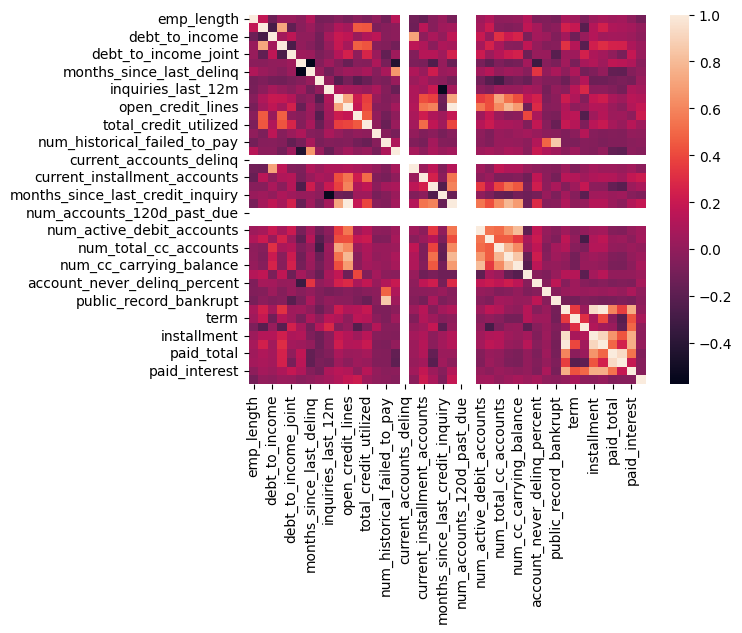

In [176]:
sns.heatmap(loans_df.corr(numeric_only=True))

I'm seeing a lack of correlation between a lot of different features. The column "emp_length" doesn't seem to have a very strong correlation with anything, and neither does "total_collection_amount_ever". For the feature selection, I will be selecting the following columns: emp_length, total_collection_amount_ever, account_never_delinq_percent, public_record_bankrupt, term, installment, paid_total, and paid_interest. These columns seem to have a low amount of multicolinearity, while still being relevant to the topic at hand.

### Question 4

<Axes: >

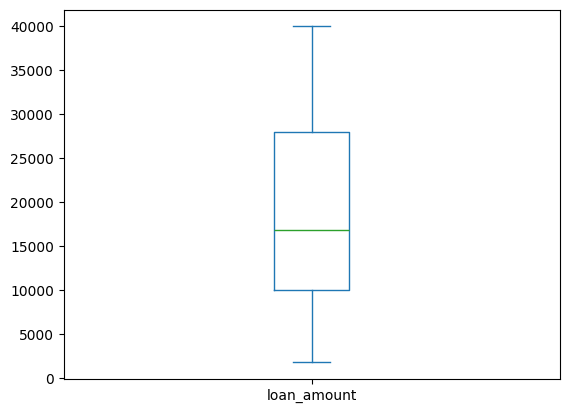

In [177]:
loans_df['loan_amount'].plot(kind='box')

I had already removed the null values during preprocessing so it doesn't seem to have affected the box plot. It appears that the median loan amount for this data set is around 15,000. The lower and upper quartiles are, at my guess, around 9000 and 25,000 respectively. The maximum loan amount represented is around 40,000.

### Question 5:

In [180]:
import time

In [179]:
states_df = loans_df['state']
pacific = ['AK', 'AZ', 'CA', 'HI', 'ID', 'NV', 'OR', 'UT', 'WA']
plains = ['CO', 'KS', 'MT', 'ND', 'NE', 'NM', 'OK', 'SD', 'TX', 'WY']
midwest = ['IA', 'IL', 'IN', 'MI', 'MN', 'MO', 'OH', 'WI']
northeast = ['CT', 'DC', 'DE', 'MD', 'MA', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
south = ['AL', 'AR', 'GA', 'FL', 'KY', 'MS', 'NC', 'SC', 'TN', 'LA', 'VA', 'WV']
loans_df['region'] = states_df.apply(lambda x: "Pacific" if x in pacific else
                                             ("Plains" if x in plains else
                                             ("Midwest" if x in midwest else
                                             ("Northeast" if x in northeast else
                                             ("South" if x in south else np.nan)))))
loans_df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
37,supplies clerk,10.0,NJ,MORTGAGE,70000.0,Verified,17.06,105000.0,Verified,13.27,...,Mar-2018,In Grace Period,whole,Cash,23455.27,1102.83,544.73,558.10,0.0,Northeast
99,owner,10.0,MN,MORTGAGE,23000.0,Verified,49.58,98000.0,Verified,19.87,...,Feb-2018,Current,whole,Cash,14395.45,1572.97,604.55,968.42,0.0,Midwest
130,military officer captain,10.0,GA,RENT,145000.0,Verified,14.66,155000.0,Source Verified,14.98,...,Feb-2018,Current,whole,Cash,35942.19,4890.01,4057.81,832.20,0.0,South
214,realtor / assistant,5.0,NJ,MORTGAGE,80000.0,Not Verified,18.39,125000.0,Not Verified,11.77,...,Jan-2018,Current,whole,Cash,13068.02,1460.76,931.98,528.78,0.0,Northeast
352,manager,10.0,TX,MORTGAGE,120000.0,Verified,7.81,198000.0,Verified,15.15,...,Jan-2018,Current,whole,Cash,21847.54,3859.28,3152.46,706.82,0.0,Plains
411,community development manger,3.0,CA,RENT,55000.0,Source Verified,12.52,198000.0,Source Verified,24.29,...,Mar-2018,Current,whole,Cash,14811.36,1413.83,713.64,700.19,0.0,Pacific
472,office manager,1.0,CA,RENT,41000.0,Source Verified,27.43,101000.0,Source Verified,11.13,...,Jan-2018,Current,whole,Cash,10353.23,1132.78,446.77,686.01,0.0,Pacific
516,receptionist,3.0,SC,MORTGAGE,3300.0,Not Verified,469.09,283300.0,Not Verified,9.79,...,Feb-2018,Current,whole,Cash,22643.18,3287.65,2356.82,930.83,0.0,South
564,senior cohort sales advisor,3.0,VA,RENT,200000.0,Source Verified,27.40,300000.0,Source Verified,28.08,...,Jan-2018,Current,whole,Cash,18684.61,2110.27,1315.39,794.88,0.0,South
627,executive assistant/office manager,2.0,WA,RENT,113000.0,Not Verified,23.57,262000.0,Not Verified,16.59,...,Feb-2018,Current,whole,Cash,20832.99,1834.06,1167.01,667.05,0.0,Pacific


Honestly, I'm giving up on this question because I don't really know what lambda is in the first place (the textbook didn't help) and I don't have time to attend office hours or tutoring sessions. It's currently 1am and I've been stuck on this question for two hours.

### Question 6:

I also gave up on this one because I have no idea what a subplot histogram is and all the documentation online only confused me more. I gave it my best effort but I genuinely have no idea what is happening with this question or in this unit.